In [42]:
# learning from http://samcarcagno.altervista.org/blog/basic-sound-processing-python/

In [43]:
import pylab
from scipy.io import wavfile

In [44]:
sampFreq, snd = wavfile.read('440_sine.wav')

In [45]:
sampFreq

44100

In [46]:
snd

array([[0, 0],
       [0, 0],
       [0, 0],
       ..., 
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int16)

In [47]:
#the scipy.io.wavfile.read function reads wav files as int16 (for 16-bit wavs) or int32 (for 32-bit wavs), 24-bit wav files are not supported

In [48]:
#this means that the sound pressure values are mapped to integer values that can range from -2^15 to (2^15)-1

In [49]:
snd.shape

(5292, 2)

In [50]:
# ie two channels 5292 sample points

In [51]:
snd = snd / (2.**15) #converts our sound array to floating point values ranging from -1 to 1

In [52]:
5292.0 / sampFreq # considering the sampling rate (sampFreq = 44110) this corresponds to a duration of 120 ms

0.12

In [53]:
len(snd)

5292

In [54]:
snd[4]

array([ 0.,  0.])

In [55]:
snd[2500]

array([-0.01290894, -0.01290894])

In [56]:
# two values for two channels

In [57]:
s1 = snd[:,0] # work with one channel

In [58]:
#if you’re interested in having sound playback from python check out pyalsaaudio (only Linux) or PyAudio

In [59]:
timeArray = pylab.arange(0, 5292, 1)

In [60]:
timeArray

array([   0,    1,    2, ..., 5289, 5290, 5291])

In [61]:
timeArray = timeArray / float(sampFreq)

In [62]:
timeArray

array([  0.00000000e+00,   2.26757370e-05,   4.53514739e-05, ...,
         1.19931973e-01,   1.19954649e-01,   1.19977324e-01])

In [63]:
timeArray = timeArray * 1000

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt

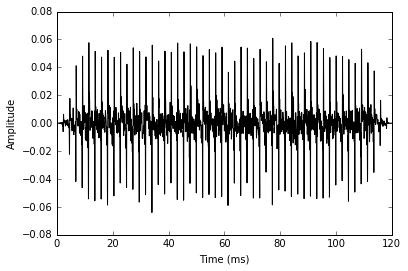

In [70]:
plt.plot(timeArray, s1, color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')

In [73]:
#Another useful graphical representation is that of the frequency content, or spectrum of the tone

In [74]:
#obtain the frequency spectrum of the sound using the fft function, that implements a Fast Fourier Transform algorithm

In [ ]:
# We’ll follow closely the technical document available https://web.archive.org/web/20120615002031/http://www.mathworks.com/support/tech-notes/1700/1702.html to obtain the power spectrum of our sound.

In [83]:
p = pylab.fft(s1) # take the fourier transform 

In [84]:
p #array of complex numbers

array([-0.33663940+0.j        ,  0.26251154-0.3079739j ,
        0.52259076+0.24347809j, ...,  0.26140157+0.16932575j,
        0.52259076-0.24347809j,  0.26251154+0.3079739j ])

In [75]:
n = len(s1) 

In [77]:
nUniquePts = int(pylab.ceil((n+1)/2.0)) #ceil give the ceiling of a value i.e the smallest integer larger than that value

In [78]:
nUniquePts #number of unique points 

2647

In [79]:
p = p[0:nUniquePts]
p

array([ -3.36639404e-01 +0.00000000e+00j,
         2.62511545e-01 -3.07973896e-01j,
         5.22590764e-01 +2.43478093e-01j, ...,
         5.57675918e-04 -3.53467288e-04j,
        -2.72537919e-04 -1.35899341e-04j,   5.18798828e-04 -4.40619763e-16j])

In [81]:
p = abs(p)
p

array([  3.36639404e-01,   4.04672994e-01,   5.76526399e-01, ...,
         6.60258702e-04,   3.04541538e-04,   5.18798828e-04])